# Diabetes Prediction using SVM

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\MRINALINI\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import dataset

In [2]:
data=pd.read_csv("diabetes.csv")
df=pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# View data statistically

In [3]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

# Splitting of dataset

In [6]:
x = df.iloc[:, 0:8]
y = df.iloc[:, 8]

# Graphical Representation 

<AxesSubplot:>

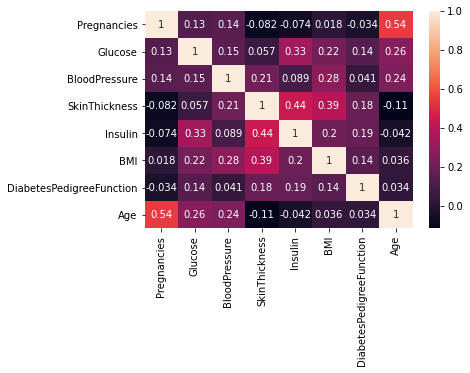

In [7]:
sns.heatmap(x.corr(), annot = True)

# Data Precprocessing

In [8]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    x[column] = x[column].replace(0, np.NaN)
    mean = int(x[column].mean(skipna=True))
    x[column] = x[column].replace(np.NaN, mean)

In [9]:
x.shape

(768, 8)

In [10]:
## Var[X] = p(1-p)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
x_filtered = sel.fit_transform(x)

print(x.head(1))
print(x_filtered[0])

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    155.0  33.6   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
[  6.  148.   72.   35.  155.   33.6  50. ]


In [11]:
#DiabetesPedigreeFunction was dropped
x = x.drop('DiabetesPedigreeFunction', axis=1)

top_4_features = SelectKBest(score_func=chi2, k=4)
x_top_4_features = top_4_features.fit_transform(x, y)
print(x.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age
0            6    148.0           72.0           35.0    155.0  33.6   50
1            1     85.0           66.0           29.0    155.0  26.6   31
2            8    183.0           64.0           29.0    155.0  23.3   32
3            1     89.0           66.0           23.0     94.0  28.1   21
4            0    137.0           40.0           35.0    168.0  43.1   33


In [12]:
print(x_top_4_features)
x = x.drop(['BMI', 'BloodPressure', 'SkinThickness'], axis=1)

[[  6. 148. 155.  50.]
 [  1.  85. 155.  31.]
 [  8. 183. 155.  32.]
 ...
 [  5. 121. 112.  30.]
 [  1. 126. 155.  47.]
 [  1.  93. 155.  23.]]


# Building the model

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0, test_size=0.20)

In [14]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [15]:
classifier = SVC(random_state=0, kernel='rbf')
classifier.fit(xtrain, ytrain)

SVC(random_state=0)

# Predicting the test results

In [16]:
ypred = classifier.predict(xtest)

In [17]:
cm = confusion_matrix(ytest, ypred)
print (cm)

[[95 12]
 [22 25]]


In [18]:
print(f1_score(ytest, ypred))

0.5952380952380952


In [19]:
print(accuracy_score(ytest, ypred))

0.7792207792207793
